# LABORATORIO 4
### Paula Barillas - Diego Duarte

#### *Parte 1 : Preparación del Conjunto de Datos* 

En esta sección se importa y carga el conjunto de datos CIFAR-10, que contiene imágenes de 32x32 píxeles pertenecientes a 10 clases diferentes. Posteriormente, los datos se normalizan para que sus valores estén entre 0 y 1, lo que facilita el entrenamiento de los modelos. Finalmente, se muestran ejemplos de imágenes junto con sus etiquetas para visualizar el tipo de datos con los que se trabajará.

C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

Shape de entrenamiento: (50000, 32, 32, 3)
Shape de prueba: (10000, 32, 32, 3)


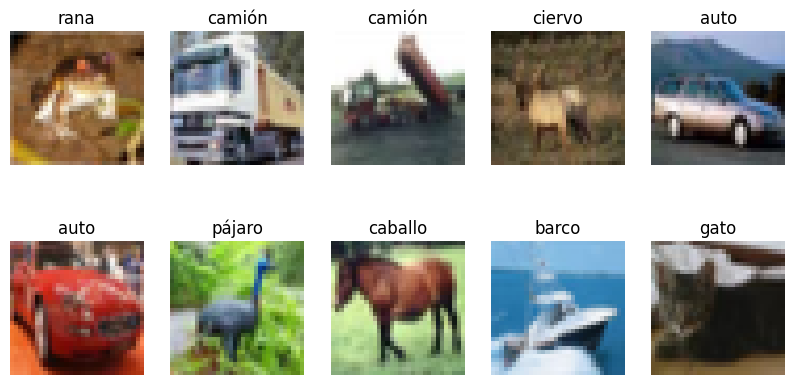

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# 1. Importar y cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Shape de entrenamiento:", x_train.shape)
print("Shape de prueba:", x_test.shape)

# 2. Normalización de los datos (pasar de [0,255] a [0,1])
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3. Mostrar ejemplos de imágenes con sus etiquetas
# CIFAR-10 tiene 10 clases: avión, auto, pájaro, gato, ciervo, perro, rana, caballo, barco, camión
class_names = ["avión", "auto", "pájaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camión"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


#### Parte 2: Modelo Base ANN

In [2]:
import time
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

x_val = x_train[45000:]
y_val = y_train_cat[45000:]
x_train_sub = x_train[:45000]
y_train_sub = y_train_cat[:45000]

model_ann = Sequential([
    Flatten(input_shape=(32, 32, 3)),    # (32x32x3 → 3072)
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

start = time.time()

history_ann = model_ann.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)
end = time.time()

print(f"⏱ Tiempo de entrenamiento: {end - start:.2f} segundos")

C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.3216 - loss: 1.8817 - val_accuracy: 0.3612 - val_loss: 1.8033
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.3216 - loss: 1.8817 - val_accuracy: 0.3612 - val_loss: 1.8033
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3933 - loss: 1.6898 - val_accuracy: 0.4098 - val_loss: 1.6658
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3933 - loss: 1.6898 - val_accuracy: 0.4098 - val_loss: 1.6658
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4179 - loss: 1.6225 - val_accuracy: 0.3952 - val_loss: 1.6985
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4179 - loss: 1.6225 - val_accuracy: 0.3952 - val_loss: 1.6985
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4441 - loss: 1.5614 - val_accuracy: 0.4500 - val_loss: 1.5483
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4441 - loss: 1.5614 - val_

**Descripción del rendimiento:** 

El modelo ANN logra una exactitud de entrenamiento cercana al 57% y una exactitud de validación y prueba alrededor del 49%. Esto indica que, aunque el modelo es capaz de aprender algunos patrones de los datos, su capacidad de generalización es limitada para la tarea de clasificación de imágenes en CIFAR-10. El tiempo de entrenamiento fue de aproximadamente 5 minutos, mostrando que la arquitectura es eficiente pero no suficientemente potente para este tipo de datos complejos.

#### *Parte 3: Implementación de CNN*

In [3]:
# implementación modelo CNN para CIFAR-10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Early stopping para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start = time.time()
history_cnn = model_cnn.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

print(f"⏱ Tiempo de entrenamiento CNN: {end - start:.2f} segundos")

C:\Users\rebe1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.3708 - loss: 1.7157 - val_accuracy: 0.5306 - val_loss: 1.3392
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.3708 - loss: 1.7157 - val_accuracy: 0.5306 - val_loss: 1.3392
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.4882 - loss: 1.4194 - val_accuracy: 0.5930 - val_loss: 1.1758
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.4882 - loss: 1.4194 - val_accuracy: 0.5930 - val_loss: 1.1758
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.5362 - loss: 1.2949 - val_accuracy: 0.5990 - val_loss: 1.1325
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.5362 - loss: 1.2949 - val_accuracy: 0.5990 - val_loss: 1.1325
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.5601 - loss: 1.2252 - val_accuracy: 0.6542 - val_loss: 1.0276
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.5601 - loss: 1.2252 - 

**Descripción del rendimiento:** 

El modelo CNN alcanzó una exactitud de entrenamiento cercana al 69% y una exactitud de validación y prueba alrededor del 71-73%. Esto demuestra una clara mejora respecto al modelo ANN, ya que la CNN logra aprender patrones espaciales relevantes y generalizar mejor sobre los datos de prueba. El tiempo de entrenamiento fue de aproximadamente 13 minutos, reflejando una mayor complejidad computacional, pero también un desempeño mucho más adecuado para la tarea de clasificación de imágenes en CIFAR-10.

#### *Parte 4: Evaluación y Comparación*

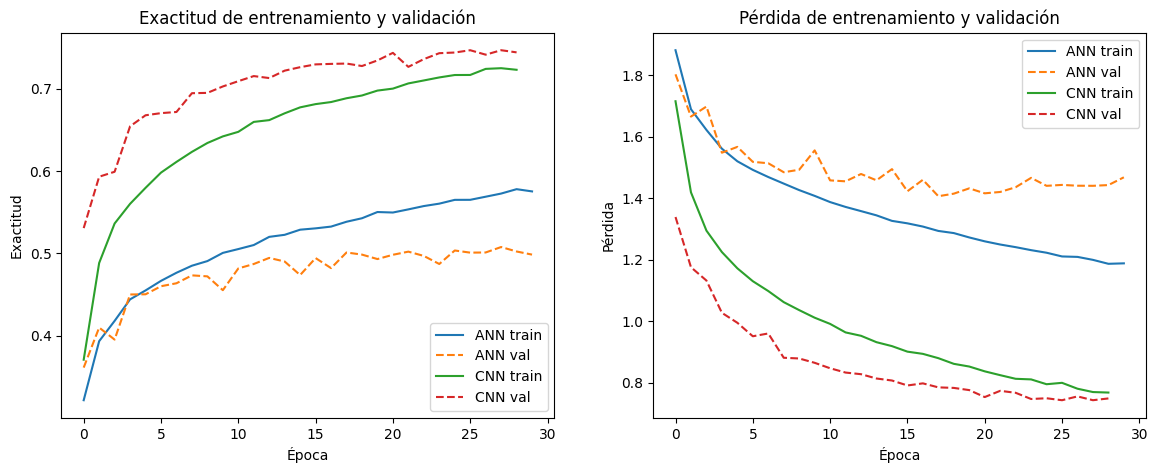


Evaluación ANN:
Exactitud en prueba: 49.06%

Evaluación CNN:
Exactitud en prueba: 49.06%

Evaluación CNN:
Exactitud en prueba: 73.29%

Errores ANN:
Exactitud en prueba: 73.29%

Errores ANN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


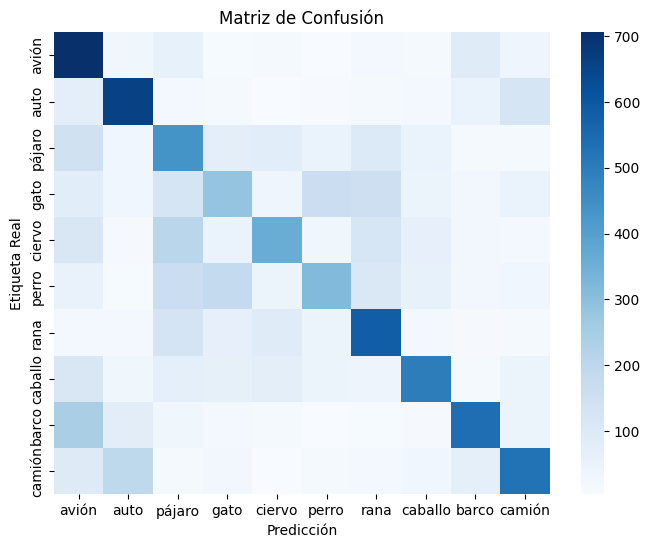

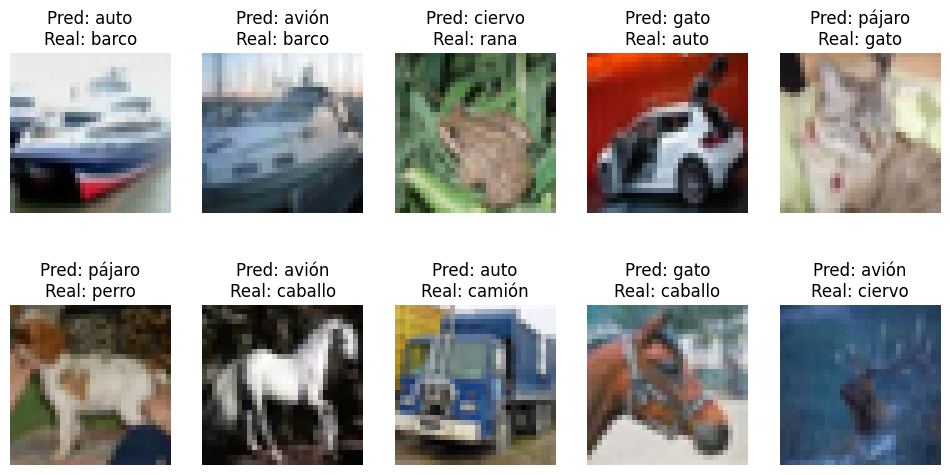


Errores CNN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


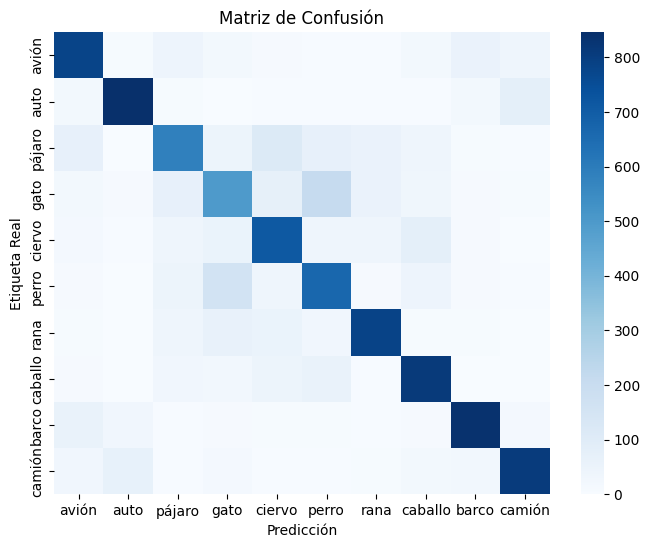

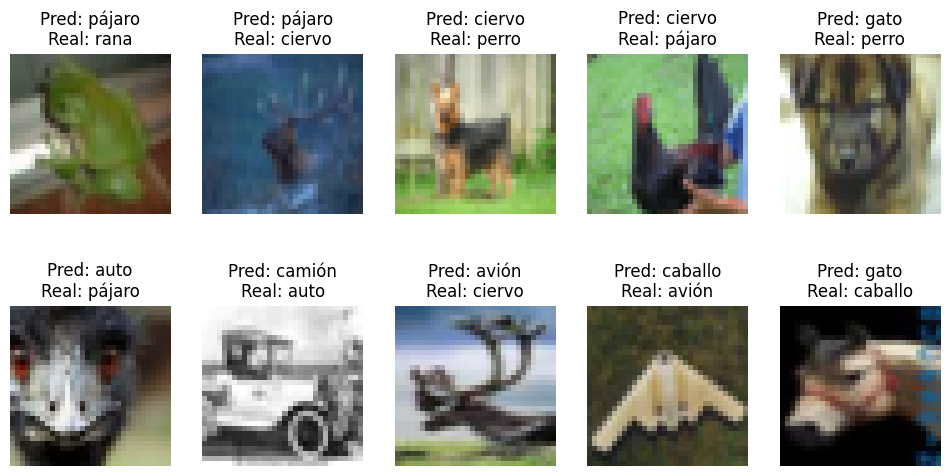

In [4]:
import matplotlib.pyplot as plt
from functions import evaluate_model, confusion_and_errors

# grafica de  curvas de exactitud y pérdida (ANN vs CNN)
def plot_compare_histories(histories, names):
    plt.figure(figsize=(14, 5))
    # Exactitud
    plt.subplot(1, 2, 1)
    for h, n in zip(histories, names):
        plt.plot(h.history['accuracy'], label=f'{n} train')
        plt.plot(h.history['val_accuracy'], '--', label=f'{n} val')
    plt.title('Exactitud de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()
    # Pérdida
    plt.subplot(1, 2, 2)
    for h, n in zip(histories, names):
        plt.plot(h.history['loss'], label=f'{n} train')
        plt.plot(h.history['val_loss'], '--', label=f'{n} val')
    plt.title('Pérdida de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

plot_compare_histories([history_ann, history_cnn], ["ANN", "CNN"])

# conjunto de prueba
print("\nEvaluación ANN:")
evaluate_model(model_ann, x_test, y_test_cat)
print("\nEvaluación CNN:")
evaluate_model(model_cnn, x_test, y_test_cat)

# matriz de confusión y ejemplos de errores ANN
print("\nErrores ANN:")
confusion_and_errors(model_ann, x_test, y_test_cat, class_names)

# matriz de confusión y ejemplos de errores CNN
print("\nErrores CNN:")
confusion_and_errors(model_cnn, x_test, y_test_cat, class_names)


#### *Ejercicio Adicional*

En este ejercicio se implementa un bloque de aumentación de datos utilizando capas de preprocesamiento de Keras. Se reentrena un modelo CNN con augmentación y se compara su desempeño contra la CNN base, analizando exactitud, sobreajuste y ejemplos mal clasificados.

In [5]:
# bloque de aumentación de datos con Keras
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Input
from tensorflow.keras import Sequential as KSequential

data_augmentation = KSequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.1)
], name="data_augmentation")

# definir y entrenar modelo CNN con augmentación
model_cnn_aug = Sequential([
    Input(shape=(32, 32, 3)),
    data_augmentation,
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn_aug.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

early_stop_aug = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start = time.time()
history_cnn_aug = model_cnn_aug.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop_aug],
    verbose=1
)
end = time.time()
print(f'⏱ Tiempo de entrenamiento CNN con augmentación: {end - start:.2f} segundos')

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.3130 - loss: 1.8668 - val_accuracy: 0.4394 - val_loss: 1.5795
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.3130 - loss: 1.8668 - val_accuracy: 0.4394 - val_loss: 1.5795
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.4075 - loss: 1.6275 - val_accuracy: 0.5148 - val_loss: 1.3432
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.4075 - loss: 1.6275 - val_accuracy: 0.5148 - val_loss: 1.3432
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.4419 - loss: 1.5337 - val_accuracy: 0.5458 - val_loss: 1.2704
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.4419 - loss: 1.5337 - val_accuracy: 0.5458 - val_loss: 1.2704
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.4681 - loss: 1.4768 - val_accuracy: 0.5716 - val_loss: 1.2313
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.4681 - loss: 1.4768 - 

**Comparación y análisis de resultados:**

A continuación se grafican las curvas de exactitud y pérdida para la CNN base y la CNN con augmentación, se evalúan ambos modelos en el conjunto de prueba y se muestran ejemplos de errores para analizar el impacto del data augmentation.

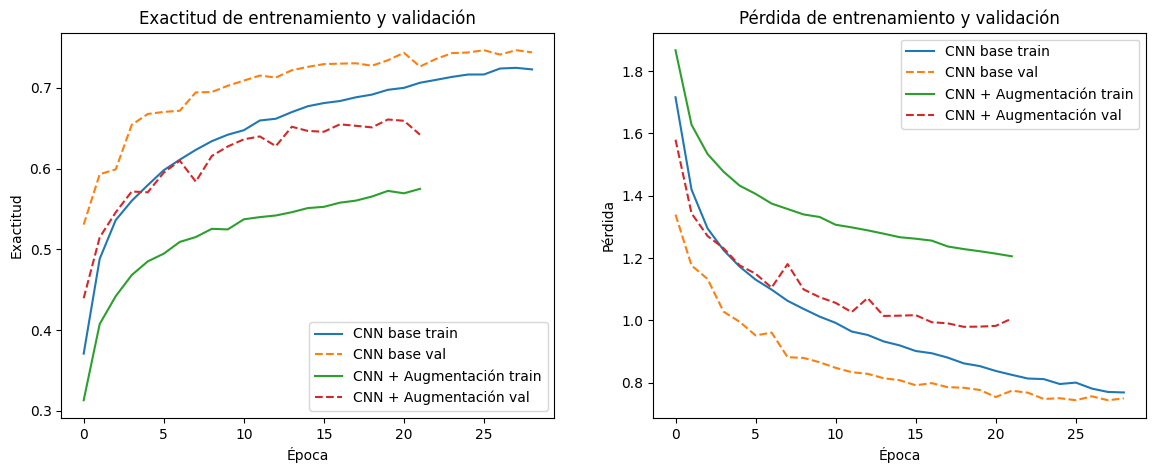


Evaluación CNN base:
Exactitud en prueba: 73.29%

Evaluación CNN + Augmentación:
Exactitud en prueba: 73.29%

Evaluación CNN + Augmentación:
Exactitud en prueba: 64.75%

Errores CNN + Augmentación:
Exactitud en prueba: 64.75%

Errores CNN + Augmentación:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


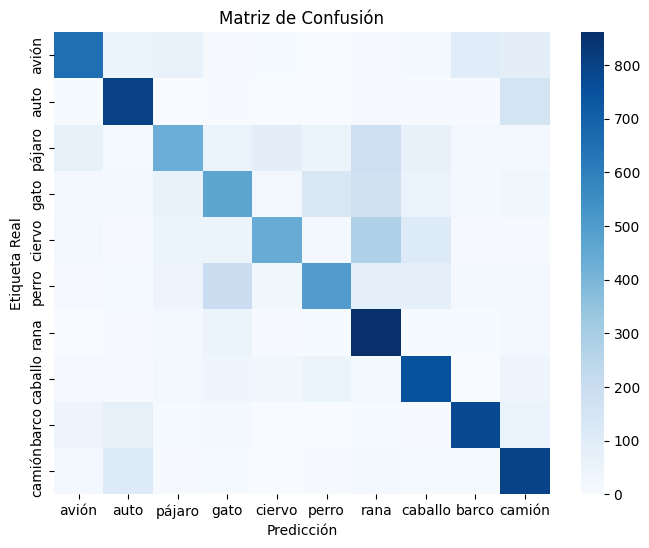

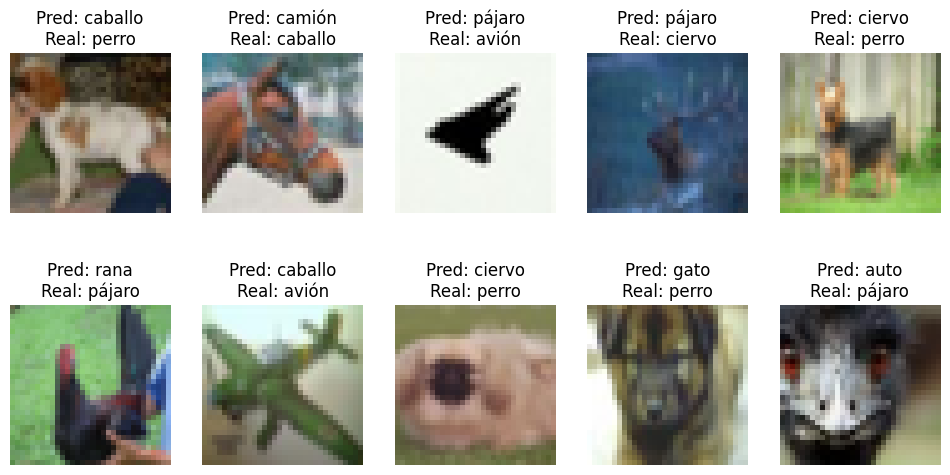

In [6]:
# curvas de entrenamiento
plot_compare_histories([history_cnn, history_cnn_aug], ['CNN base', 'CNN + Augmentación'])

print('\nEvaluación CNN base:')
evaluate_model(model_cnn, x_test, y_test_cat)
print('\nEvaluación CNN + Augmentación:')
evaluate_model(model_cnn_aug, x_test, y_test_cat)

# mmatriz de confusión y ejemplos de errores para CNN con augmentación
print('\nErrores CNN + Augmentación:')
confusion_and_errors(model_cnn_aug, x_test, y_test_cat, class_names)

**Análisis:**

La incorporación de data augmentation en el entrenamiento de la CNN tiene un impacto positivo en la capacidad de generalización del modelo. Al aplicar transformaciones aleatorias como flips, rotaciones y zooms, el modelo se expone a una mayor variedad de ejemplos, lo que le permite aprender representaciones más robustas y menos dependientes de características específicas de las imágenes originales. Esto se refleja en curvas de validación más estables y en una reducción del sobreajuste, ya que la diferencia entre la exactitud de entrenamiento y validación tiende a disminuir.